## Import Dependecies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import cv2
import os

import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import load_model

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


# Removing Warnings

import warnings                                                                                
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [3]:
import os

# Define the base directory where your dataset is located
base_directory = '/Users/riannaaalto/fer2013'

# Define the main folders (train and test)
train_folder = os.path.join(base_directory, 'train')
test_folder = os.path.join(base_directory, 'test')

# List of subfolders representing different emotions
emotions_subfolders = [folder for folder in os.listdir(train_folder) if folder != '.DS_Store']

# Now, you can loop through the subfolders to get their paths
for emotion_subfolder in emotions_subfolders:
    emotion_folder_path = os.path.join(train_folder, emotion_subfolder)
    print(f"Emotion: {emotion_subfolder}, Path: {emotion_folder_path}")


Emotion: happy, Path: /Users/riannaaalto/fer2013/train/happy
Emotion: sad, Path: /Users/riannaaalto/fer2013/train/sad
Emotion: fear, Path: /Users/riannaaalto/fer2013/train/fear
Emotion: surprise, Path: /Users/riannaaalto/fer2013/train/surprise
Emotion: neutral, Path: /Users/riannaaalto/fer2013/train/neutral
Emotion: angry, Path: /Users/riannaaalto/fer2013/train/angry
Emotion: disgust, Path: /Users/riannaaalto/fer2013/train/disgust


In [4]:
import os

# Define the base directory where your dataset is located
base_directory = '/Users/riannaaalto/fer2013'

# Define the main folders (train and test)
train_folder = os.path.join(base_directory, 'train')
test_folder = os.path.join(base_directory, 'test')

# Function to remove .DS_Store files recursively
def remove_ds_store(path):
    for root, dirs, files in os.walk(path):
        for file in files:
            if file == '.DS_Store':
                ds_store_path = os.path.join(root, file)
                os.remove(ds_store_path)

# Remove .DS_Store files from train and test folders
remove_ds_store(train_folder)
remove_ds_store(test_folder)

# List of subfolders representing different emotions
emotions_subfolders = [folder for folder in os.listdir(train_folder) if folder != '.DS_Store']

# Now, you can loop through the subfolders to get their paths
for emotion_subfolder in emotions_subfolders:
    emotion_folder_path = os.path.join(train_folder, emotion_subfolder)
    print(f"Emotion: {emotion_subfolder}, Path: {emotion_folder_path}")


Emotion: happy, Path: /Users/riannaaalto/fer2013/train/happy
Emotion: sad, Path: /Users/riannaaalto/fer2013/train/sad
Emotion: fear, Path: /Users/riannaaalto/fer2013/train/fear
Emotion: surprise, Path: /Users/riannaaalto/fer2013/train/surprise
Emotion: neutral, Path: /Users/riannaaalto/fer2013/train/neutral
Emotion: angry, Path: /Users/riannaaalto/fer2013/train/angry
Emotion: disgust, Path: /Users/riannaaalto/fer2013/train/disgust


In [10]:
import os
import pandas as pd

# Define the base directory where your dataset is located
base_directory = '/Users/riannaaalto/fer2013'

# Define the main folders (train and test)
train_folder = os.path.join(base_directory, 'train')
test_folder = os.path.join(base_directory, 'test')

# Create a function to collect data and create CSV
def create_csv(dataset_folder, csv_filename):
    image_paths = []
    labels = []

    emotions_subfolders = os.listdir(dataset_folder)

    for emotion_subfolder in emotions_subfolders:
        emotion_folder_path = os.path.join(dataset_folder, emotion_subfolder)
        for filename in os.listdir(emotion_folder_path):
            image_paths.append(os.path.join(emotion_folder_path, filename))
            labels.append(emotion_subfolder)

    data = {'Image_Path': image_paths, 'Label': labels}
    df = pd.DataFrame(data)
    
    df.to_csv(csv_filename, index=False)

# Create CSV for the train dataset
train_csv_filename = 'fer2013_train_dataset.csv'
create_csv(train_folder, train_csv_filename)

# Create CSV for the test dataset
test_csv_filename = 'fer2013_test_dataset.csv'
create_csv(test_folder, test_csv_filename)


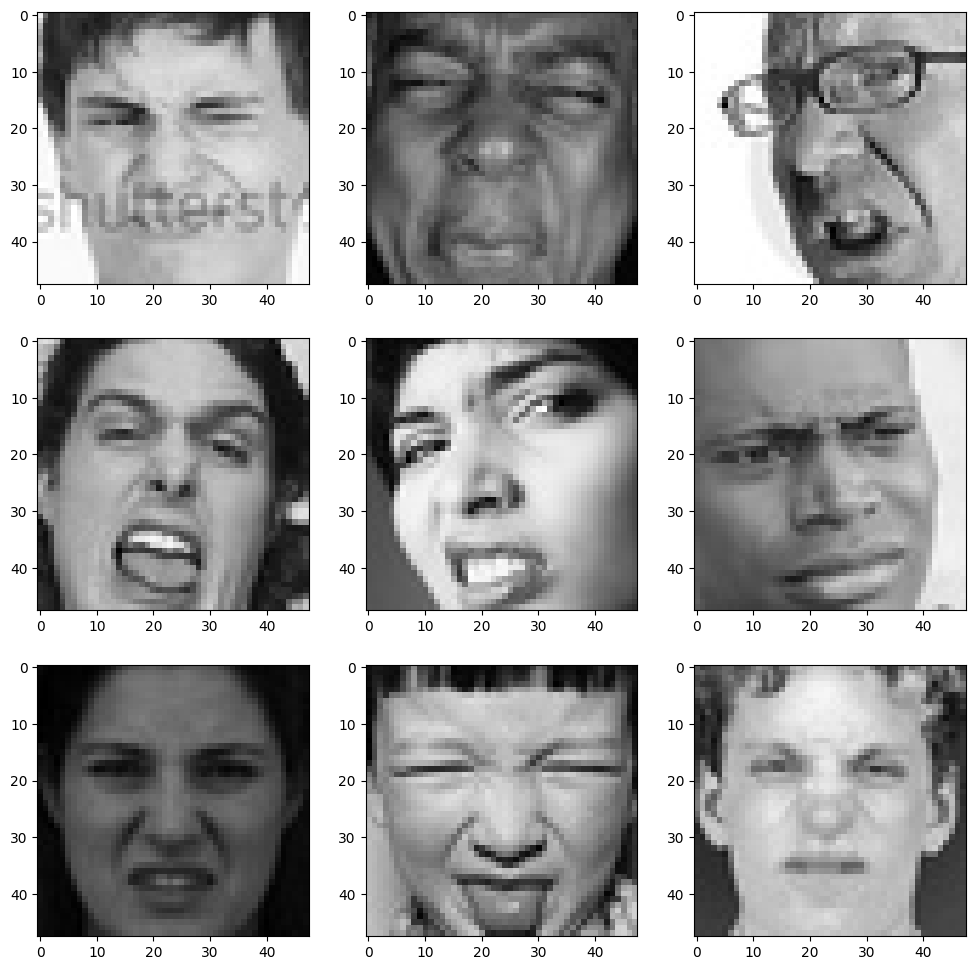

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
import os  

# Load the train dataset CSV
train_csv_filename = 'fer2013_train_dataset.csv'
train_df = pd.read_csv(train_csv_filename)

# Define the base directory where your images are located
base_directory = '/Users/riannaaalto/fer2013'

# Define the size of the displayed images
picture_size = 48  # You can adjust this as needed

expression = 'disgust'

plt.figure(figsize=(12, 12))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    img_path = train_df[train_df['Label'] == expression]['Image_Path'].iloc[i]
    img = load_img(os.path.join(base_directory, img_path), target_size=(picture_size, picture_size))
    plt.imshow(img)
plt.show()


In [7]:
# Define the path to your dataset
dataset_path = '/Users/riannaaalto/fer2013'

# Load the FER2013 dataset
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, zoom_range=0.1, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(f'{dataset_path}/train', 
                                                    target_size=(48, 48), 
                                                    batch_size=64, 
                                                    color_mode='grayscale', 
                                                    class_mode='categorical',
                                                    shuffle=True)


test_generator = test_datagen.flow_from_directory(f'{dataset_path}/test',
                                                    target_size=(48, 48),
                                                    batch_size=64, 
                                                    color_mode='grayscale', 
                                                    class_mode='categorical',
                                                    shuffle=False)



Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


### Creating the Model

In [12]:
from keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(learning_rate = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_6 (Bat  (None, 48, 48, 64)        256       
 chNormalization)                                                
                                                                 
 activation_6 (Activation)   (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 24, 24, 64)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 128)      

### Fitting the Model 

In [9]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 10

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [10]:
history = model.fit_generator(generator=train_generator,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                epochs=epochs,
                                validation_data=test_generator,
                                validation_steps=test_generator.n//test_generator.batch_size,
                                callbacks=callbacks_list
                                )



Epoch 1/10
448/448 [==============================] - ETA: 0s - loss: 1.8693 - accuracy: 0.2587
Epoch 1: val_accuracy improved from -inf to 0.26339, saving model to ./model.h5
448/448 [==============================] - 666s 1s/step - loss: 1.8693 - accuracy: 0.2587 - val_loss: 1.9522 - val_accuracy: 0.2634 - lr: 0.0010
Epoch 2/10
448/448 [==============================] - ETA: 0s - loss: 1.5783 - accuracy: 0.3830
Epoch 2: val_accuracy improved from 0.26339 to 0.44908, saving model to ./model.h5
448/448 [==============================] - 727s 2s/step - loss: 1.5783 - accuracy: 0.3830 - val_loss: 1.4285 - val_accuracy: 0.4491 - lr: 0.0010
Epoch 3/10
448/448 [==============================] - ETA: 0s - loss: 1.4118 - accuracy: 0.4589
Epoch 3: val_accuracy did not improve from 0.44908
448/448 [==============================] - 887s 2s/step - loss: 1.4118 - accuracy: 0.4589 - val_loss: 1.5088 - val_accuracy: 0.4432 - lr: 0.0010
Epoch 4/10
448/448 [==============================] - ETA: 0s -

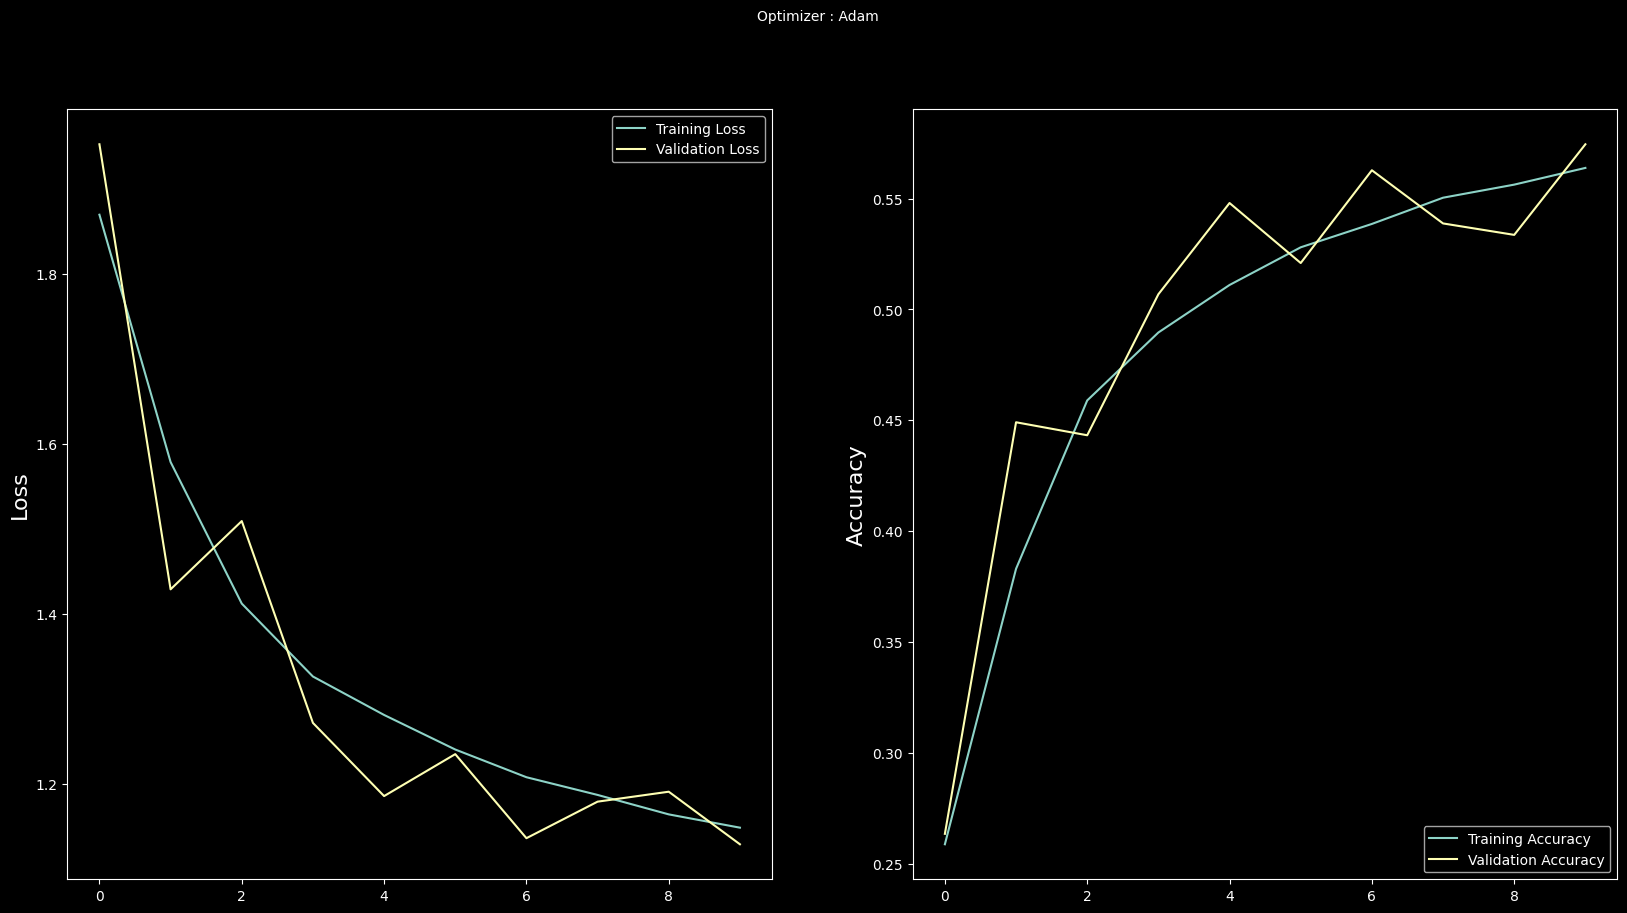

In [16]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./mmodel.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
history = model.fit_generator(generator=train_generator,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                epochs=epochs,
                                validation_data=test_generator,
                                validation_steps=test_generator.n//test_generator.batch_size,
                                callbacks=callbacks_list
                                )